# Programming Machine Learning Lab
# Exercise 6

**General Instructions:**

1. You need to submit the PDF as well as the filled notebook file.
1. Name your submissions by prefixing your matriculation number to the filename. Example, if your MR is 12345 then rename the files as **"12345_Exercise_6.xxx"**
1. Complete all your tasks and then do a clean run before generating the final pdf. (_Clear All Ouputs_ and _Run All_ commands in Jupyter notebook)

**Exercise Specific instructions::**

1. You are allowed to use only NumPy and Pandas (unless stated otherwise). You can use any library for visualizations.


### Part 1 - Variable Selection

**Forward and Backward Search**


Load the dataset **"variable_selection.npy"** by running the code below, the dataset consists of over 100 predictors and a numeric target. We generated the regression dataset such that only a few predictors are relevant. Split the dataset in train, validation and test sets with 70-20-10 ratio. *(Remember to add randomness to the index selection for splitting)*



In [1]:
import numpy as np

with open('variable_selection.npy', 'rb') as f:
    X = np.load(f)
    y = np.load(f)



Perform the following experiments using the least angle regression algorithm. **You can use sklearn for this exercise (sklearn.linear_model.Lars)**. The selection criteria (gain) would be loss on the validation set (e.g. for forward selection, you would need to select the variable that reduces the validation loss the most).
- Forward Search
- Backward Search

The algorithm for forward search is given below:

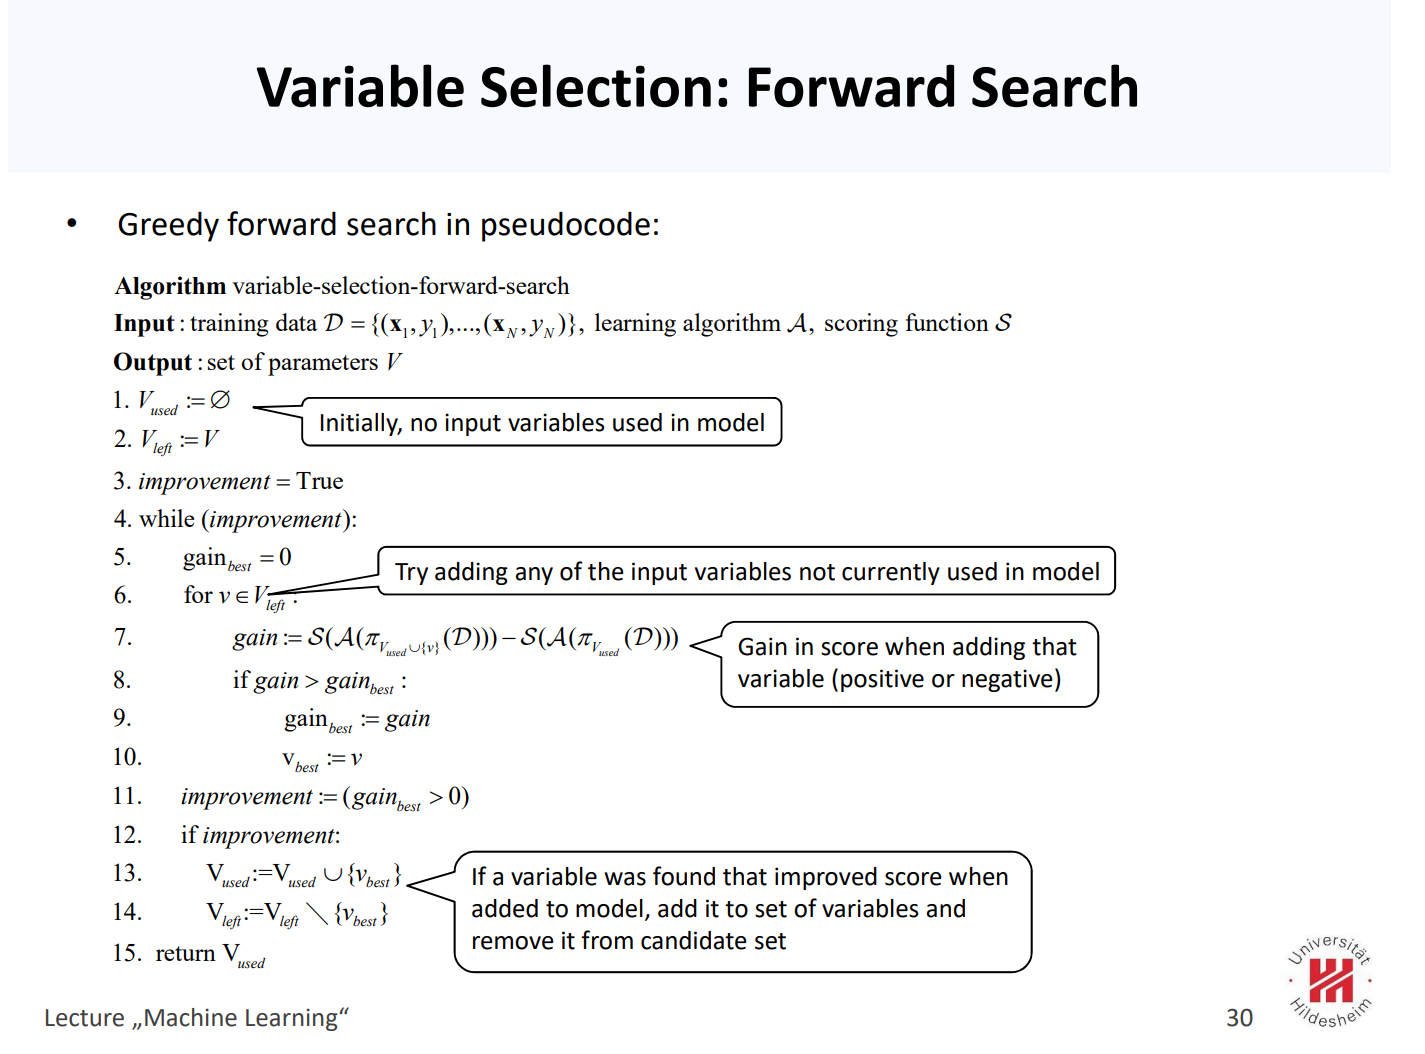

In [2]:
## Imports
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.linear_model import Lars
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,ElasticNet,Lasso
from sklearn.metrics import mean_squared_error

In [3]:
### Write your code here
class FeatureSelector:
    def __init__(self, Xtrain, Xvalid, Ytrain, Yvalid):
        self.Xtrain = Xtrain
        self.Xvalid = Xvalid
        self.Ytrain = Ytrain
        self.Yvalid = Yvalid
        self.m = Xtrain.shape[1]

    def score(self, V):
        Xt = np.concatenate([np.ones([self.Xtrain.shape[0], 1]), self.Xtrain[:, V]], axis=1)
        Xv = np.concatenate([np.ones([self.Xvalid.shape[0], 1]), self.Xvalid[:, V]], axis=1)
        
        # Initialize Least Angle Regression Model
        least_angle_regression = Lars()
        least_angle_regression.fit(Xt, self.Ytrain)
        
        pred_train = least_angle_regression.predict(Xt)
        pred_valid = least_angle_regression.predict(Xv)
        train_mse = ((pred_train - self.Ytrain) ** 2).mean()
        val_mse = ((pred_valid - self.Yvalid) ** 2).mean()
        return train_mse, val_mse

    def forward_search(self):
        improvement = True
        self.V_used = []
        self.V_left = list(np.arange(self.m))

        while improvement:
            # Calculate the current training and validation loss
            train_loss, val_loss = self.score(self.V_used)
            print()
            print(self.V_used)
            print("Training Loss: {}".format(train_loss))
            print("Validation Loss: {}".format(val_loss))
            gain_best = 0

            # Iterate over the remaining features to find the one with the best gain
            for v in self.V_left:
                V_tmp = self.V_used.copy()
                V_tmp.append(v)
                gain = self.score(self.V_used)[1] - self.score(V_tmp)[1]

                if gain > gain_best:
                    gain_best = gain
                    v_best = v

            # Update selected features if there is a positive gain
            if gain_best > 0:
                self.V_used.append(v_best)
                self.V_left.remove(v_best)
            else:
                improvement = False

        # Return the selected features and final losses
        selected_features = self.V_used
        final_train_loss, final_val_loss = self.score(selected_features)
        return selected_features, final_train_loss, final_val_loss

    def backward_search(self):
        improvement = True
        self.V_used = list(np.arange(self.m))
        self.V_left = []

        while improvement and (len(self.V_used) > 0):
            # Calculate the current training and validation loss
            train_loss, val_loss = self.score(self.V_used)
            print()
            print(self.V_used)
            print("Training Loss: {}".format(train_loss))
            print("Validation Loss: {}".format(val_loss))
            gain_best = 0

            # Iterate over the remaining features to find the one with the best gain
            for v in self.V_used:
                V_tmp = self.V_used.copy()
                V_tmp.remove(v)
                gain = self.score(self.V_used)[1] - self.score(V_tmp)[1]

                if gain > gain_best:
                    gain_best = gain
                    v_best = v

            # Update selected features if there is a positive gain
            if gain_best > 0:
                self.V_used.remove(v_best)
            else:
                improvement = False

        # Return the selected features and final losses
        selected_features = self.V_used
        final_train_loss, final_val_loss = self.score(selected_features)
        return selected_features, final_train_loss, final_val_loss

In [4]:
## Splitting the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [5]:
## Testing Forward Search
feature_selector = FeatureSelector(X_train, X_valid, y_train, y_valid)
forward_selected_features, final_train_loss, final_val_loss = feature_selector.forward_search()


[]
Training Loss: 24.218544933196153
Validation Loss: 24.263215099612143

[3]
Training Loss: 15.629191627994118
Validation Loss: 15.336457591474817

[3, 1]
Training Loss: 11.912301481268575
Validation Loss: 11.55738587265944

[3, 1, 0]
Training Loss: 8.100033108097685
Validation Loss: 8.089017543817892

[3, 1, 0, 4]
Training Loss: 5.799625715772035
Validation Loss: 6.029447340006586

[3, 1, 0, 4, 35]
Training Loss: 5.796295781307889
Validation Loss: 6.0198961196129215

[3, 1, 0, 4, 35, 84]
Training Loss: 5.79355781750961
Validation Loss: 6.010676698753846

[3, 1, 0, 4, 35, 84, 90]
Training Loss: 5.79226406958873
Validation Loss: 6.002125016003227

[3, 1, 0, 4, 35, 84, 90, 62]
Training Loss: 5.788494086325943
Validation Loss: 5.993250193856788

[3, 1, 0, 4, 35, 84, 90, 62, 92]
Training Loss: 5.7883042947238925
Validation Loss: 5.9902701831772625

[3, 1, 0, 4, 35, 84, 90, 62, 92, 74]
Training Loss: 5.783228678994124
Validation Loss: 5.988176063580222

[3, 1, 0, 4, 35, 84, 90, 62, 92, 74

In [6]:
## Testing Backward Search
backward_selected_features, final_train_loss, final_val_loss = feature_selector.backward_search()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Training Loss: 5.704312030976598
Validation Loss: 6.182481759919471

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Training Loss: 5.710367931382907
Validation Loss: 6.1610486540364

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23


[0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 86, 88, 90, 91, 92, 93, 94, 95, 98, 99]
Training Loss: 5.749073951603479
Validation Loss: 6.023160170097473

[0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 86, 88, 90, 91, 92, 93, 94, 95, 98, 99]
Training Loss: 5.749639254699678
Validation Loss: 6.019852910038811

[0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 71, 73, 74, 75, 76


[0, 1, 3, 4, 7, 9, 10, 12, 13, 16, 17, 18, 19, 20, 22, 24, 27, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 43, 46, 47, 50, 51, 54, 55, 56, 58, 59, 60, 62, 63, 65, 68, 69, 71, 74, 75, 76, 80, 83, 84, 90, 92, 94, 95, 98]
Training Loss: 5.761397205811931
Validation Loss: 5.97735451671969

[0, 1, 3, 4, 7, 9, 10, 12, 16, 17, 18, 19, 20, 22, 24, 27, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 43, 46, 47, 50, 51, 54, 55, 56, 58, 59, 60, 62, 63, 65, 68, 69, 71, 74, 75, 76, 80, 83, 84, 90, 92, 94, 95, 98]
Training Loss: 5.761602685747139
Validation Loss: 5.976660150305971

[0, 1, 3, 4, 7, 9, 10, 12, 16, 17, 18, 19, 20, 22, 24, 27, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 43, 46, 47, 50, 51, 54, 55, 56, 58, 59, 60, 62, 63, 65, 68, 69, 71, 74, 75, 76, 80, 83, 84, 90, 92, 94, 95]
Training Loss: 5.761819475217309
Validation Loss: 5.975991647730786

[0, 1, 3, 4, 7, 9, 10, 12, 16, 17, 18, 19, 20, 22, 24, 27, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 43, 46, 47, 50, 51, 54, 55, 56, 58, 59, 60, 62, 63, 65, 68, 7

**Backward Search**

The algorithm for backward search is given as:

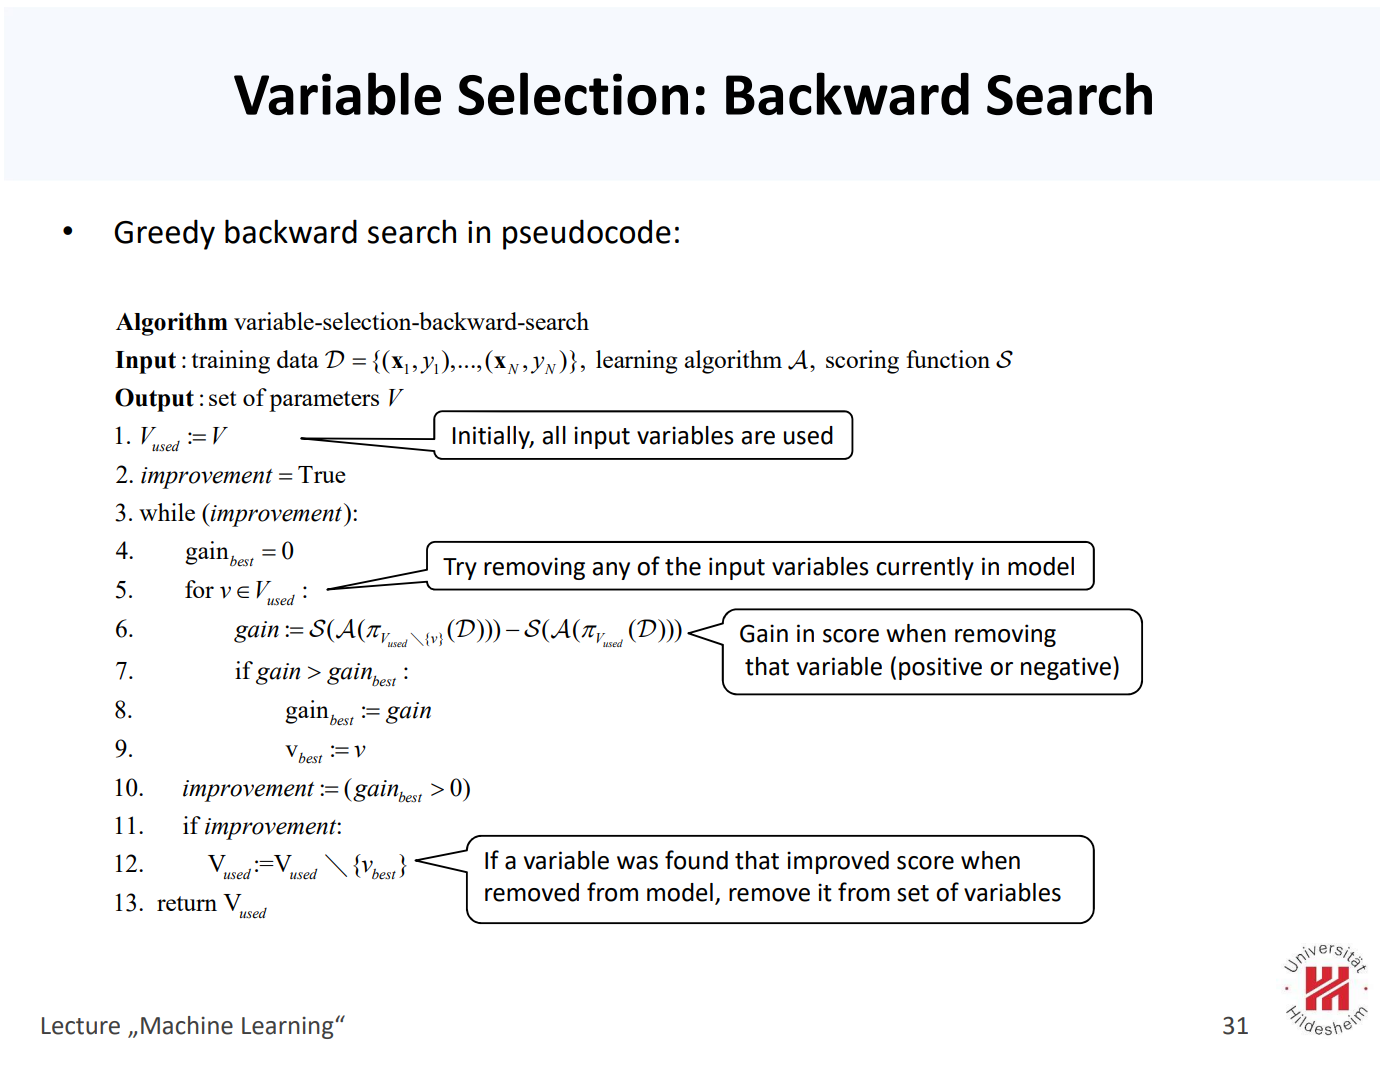



In [7]:
# Check if the selected features from forward and backward selection are the same
if sorted(forward_selected_features) == sorted(backward_selected_features):
    print('Both Forward and Backward Selected features are the same')
else:
    print('Both Forward and Backward Selected features are different')

# Fit a model using the features selected through forward selection
lars_model = Lars().fit(X_train[:, forward_selected_features], y_train)

# Make predictions on the test set using the selected features
predictions_on_test = lars_model.predict(X_test[:, forward_selected_features])

# Calculate mean squared error on the test set
mse_test = ((predictions_on_test - y_test) ** 2).mean()

# Print the performance (mean squared error) on the test set
print('The performance (mse) on the test set is', mse_test)

Both Forward and Backward Selected features are the same
The performance (mse) on the test set is 6.489237296490676


For reliable model evaluation and to prevent overfitting in greedy variable selection, it's crucial to use separate validation and test datasets. Using the training dataset for both feature selection and evaluation can lead to overfit models. The validation dataset aids unbiased model selection, while the test dataset assesses how well the chosen model generalizes to new, unseen data, avoiding data leakage and ensuring effective predictions on unseen examples.

**Evaluation**

- Print out the indices of the selected features, compare the outputs of the two methods. Are the indices the same?
- Compare the performance of both methods on the test dataset.
- Comment on why we need a separate validation and test dataset in this case.

### Part 2 - Regularization and Hyperparameter Search


Variable selection via forward and backward search drops some predictors; in some cases, we don't want to remove these predictors. Rather we want their coefficients to be small as possible. We are going to test the effect of the regularization term alpha. We will use the same data as in Variable Selection. 

Furthermore, we will use following sklearn implementation: 
- Ridge regression (sklearn.linear_model.Ridge)
- Lasso (sklearn.linear_model.Lasso)
- Elastic-Net (sklearn.linear_model.ElasticNet)

You need to implement GridSearch and RandomSearch algorithms to tune the value of $\alpha$. In both case try 5 different values of $\alpha$. 

Remember to use the validation set to find the best hyperparameters.

In [8]:
### Write your code here
#initialize ridge, lasso and elastic net model
ridge = Ridge
elastic_net = ElasticNet
lasso = Lasso
clf_list = [ridge,elastic_net,lasso]

#param grid with different values of alpha
params = {'alpha':[10,1,0.1,0.0001,0.00001]}

In [9]:
class HyperparameterSearch:
    def __init__(self, models, alpha_values):
        # Initialize the HyperparameterSearch class with a list of models and alpha values
        self.models = models
        self.alphas = alpha_values

    def grid_search(self, X_train, y_train, X_valid, y_valid, X_test, y_test):
        # Perform grid search for hyperparameter tuning
        best_params = None
        best_model = None
        best_mse = float('inf')
        model_list = {}

        # Iterate through each model
        for model in self.models:
            model_list[model.__name__] = [[], []]
            model_loss = float('inf')

            # Iterate through each alpha value
            for alpha in self.alphas:
                current_params = alpha

                # Create the model with the current alpha
                current_model = model(alpha=current_params)
                current_model.fit(X_train, y_train)
                
                # Make predictions on the validation set
                y_pred = current_model.predict(X_valid)
                
                # Calculate mean squared error
                current_mse = mean_squared_error(y_valid, y_pred)

                # Store alpha and corresponding MSE in the model_list
                model_list[model.__name__][0].append(current_params)
                model_list[model.__name__][1].append(current_mse)

                # Update the best model if the current MSE is better
                if current_mse < best_mse:
                    best_mse = current_mse
                    best_params = current_params
                    best_model = current_model
                    
                if current_mse < model_loss:
                    best_alpha = alpha
                    best_alpha_model = current_model
            
            print(f"Best test loss for {model.__name__} for best alpha {best_alpha} is:\
            {mean_squared_error(y_test,current_model.predict(X_test))}")
                

        # Save the history of grid search
        self.grid_history = model_list
        return best_params, best_model

    def random_search(self, X_train, y_train, X_valid, y_valid, X_test, y_test, num_trials=3):
        # Perform random search for hyperparameter tuning
        best_params = None
        best_model = None
        best_mse = float('inf')
        model_list = {}

        # Iterate through each model
        for model in self.models:
            model_list[model.__name__] = [[], []]

            # Iterate for a specified number of random trials
            for _ in range(num_trials):
                alpha = random.choice(self.alphas)

                current_params = alpha
                current_model = model(alpha=current_params)
                current_model.fit(X_train, y_train)
                y_pred = current_model.predict(X_valid)
                current_mse = mean_squared_error(y_valid, y_pred)

                (model_list[model.__name__][0]).append(current_params)
                (model_list[model.__name__][1]).append(current_mse)

                # Update the best model if the current MSE is better
                if current_mse < best_mse:
                    best_mse = current_mse
                    best_params = current_params
                    best_model = current_model

        # Save the history of random search
        self.rand_history = model_list
        return best_params, best_model
    
    def plot_loss_vs_alpha(self, search='grid search'):
        # Plot the loss vs alpha for different models
        if search == 'grid search':
            models_data = self.grid_history
        else:
            models_data = self.rand_history

        for model_name, data in models_data.items():
            alphas = data[0]
            loss_values = data[1]
            plt.plot(alphas, loss_values,'o', label=model_name)

        plt.xlabel('Alpha Values')
        plt.ylabel('Loss')
        plt.title(f'Loss vs Alpha for Different Models using {search}')
        plt.legend()
        plt.xscale('log')  # Set x-axis to a logarithmic scale for better visualization
        plt.show()

In [10]:
# Create an instance of the HyperparameterSearch class
hyperparameter_search = HyperparameterSearch(clf_list, params['alpha'])

# Perform grid search
grid_best_params, grid_best_model = hyperparameter_search.grid_search(X_train, y_train, X_valid, y_valid, X_test, y_test)

# Perform random search
random_best_params, random_best_model = hyperparameter_search.random_search(X_train, y_train, X_valid, y_valid, X_test, y_test)

print('\n')
print("Grid Search - Best Model:", grid_best_model.__class__.__module__.split('.')[-1])
print("Grid Search - Best Hyperparameters:", grid_best_params)
print("Grid Search - Validation MSE:", mean_squared_error(y_valid, grid_best_model.predict(X_valid)))
print("\nRandom Search - Best Model:", random_best_model.__class__.__module__.split('.')[-1])
print("Random Search - Best Hyperparameters:", random_best_params)
print("Random Search - Validation MSE:", mean_squared_error(y_valid, random_best_model.predict(X_valid)))

Best test loss for Ridge for best alpha 1e-05 is:            6.560525173031399
Best test loss for ElasticNet for best alpha 1e-05 is:            6.560364196760573
Best test loss for Lasso for best alpha 1e-05 is:            6.5603749956461614


Grid Search - Best Model: _coordinate_descent
Grid Search - Best Hyperparameters: 0.0001
Grid Search - Validation MSE: 6.180148299877034

Random Search - Best Model: _ridge
Random Search - Best Hyperparameters: 10
Random Search - Validation MSE: 6.181904096415573


Plot a graph of $\alpha$ values vs loss for all models (one for GridSearch and one for RandomSearch). Also report the test loss for the all three models using the best $\alpha$ values.

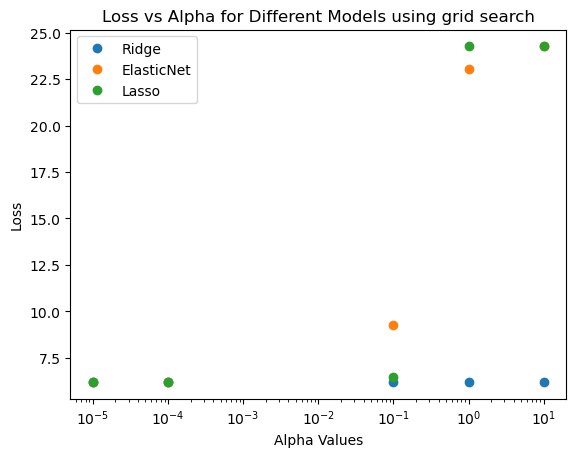

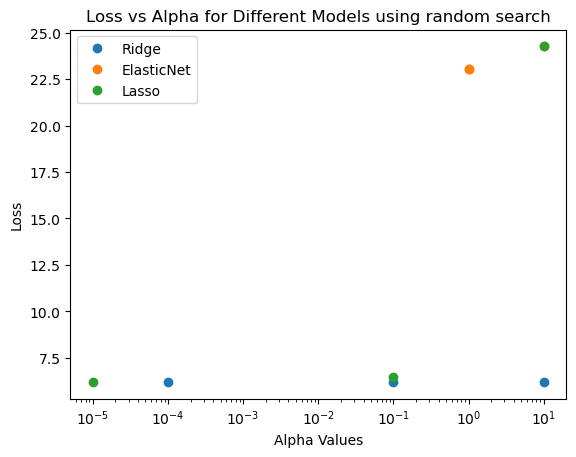

In [11]:
### write your code here
hyperparameter_search.plot_loss_vs_alpha()
hyperparameter_search.plot_loss_vs_alpha(search='random search')

### Comparison

Select the least test loss model from both of the above parts:
- Model A: from Variable Selection
- Model B: from Regularization and Hyperparameter Search

Find the list of variables not selected in Model A, use this list to separate the coefficients of the model B into two groups. Comment on the difference in the values of the coefficients of these groups.

In [12]:
### write your code here
print("Selected Features by Model A Coefficents",grid_best_model.coef_[forward_selected_features])
not_useful_variables = list(set(range(X_train.shape[1])).difference(set(forward_selected_features)))
print("\nNot selected features by Model A Coefficents",grid_best_model.coef_[not_useful_variables])

Selected Features by Model A Coefficents [ 1.00260873e+01  6.65600503e+00  6.81762844e+00  5.28668797e+00
 -2.06856099e-01 -1.90341926e-01  1.28504666e-01  2.11300771e-01
  5.33500805e-02  2.49686689e-01 -5.13587408e-02 -1.21751675e-01
  9.19938860e-02 -8.16222244e-02 -2.48711607e-02 -8.97149583e-02
  3.47738259e-02 -8.84751133e-02  2.40677619e-01 -2.17453022e-02
 -5.66782499e-03 -5.10886482e-02 -7.18218947e-03  4.77163684e-02
  7.97321132e-02  6.82881939e-02  1.72955598e-01  1.38600065e-02
 -2.23187788e-02 -5.51124088e-03 -2.07940136e-02  1.20963750e-01
 -8.71627808e-03  6.00927080e-03  1.20709872e-02 -8.78848467e-03
 -4.57615496e-02  1.55318568e-02]

Not selected features by Model A Coefficents [ 0.1959982   0.06034084  0.11966842  0.02630647  0.01849218  0.11759756
  0.06588615  0.03905662  0.08997313 -0.13746637  0.00708257 -0.05358159
 -0.00865711  0.02008644 -0.03482607 -0.13936359 -0.13920833  0.08563906
  0.11308562 -0.03051487 -0.19678393  0.07663875 -0.00488317 -0.00772873
 -